In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import os
import glob
import pickle
import numpy as np

## Fetch Word Lists, Names, and Labels

In [2]:
cats = ['sports', 'reading', 'politics_news', 'music', 'gaming', 'art']

In [3]:
documents = []

In [4]:
for cat in cats:
    os.chdir(fr'C:\Users\jonat\Desktop\Data Mining\Project\Data\Text\{cat}')
    files = glob.glob('*.pickle')
    for file in files:
        word_list = pickle.load(open(fr'C:\Users\jonat\Desktop\Data Mining\Project\Data\Text\{cat}\{file}', 'rb'))
        documents.append((' '.join(word_list), file.split('.pickle')[0], cat))

In [5]:
documents = np.array(documents)

In [16]:
documents[:, 2]

array(['sports', 'sports', 'sports', 'sports', 'reading', 'reading',
       'reading', 'reading', 'reading', 'politics_news', 'politics_news',
       'politics_news', 'politics_news', 'music', 'music', 'music',
       'music', 'music', 'gaming', 'gaming', 'gaming', 'gaming', 'gaming',
       'art', 'art', 'art', 'art', 'art'], dtype='<U142966')

## Create Document Vectors

In [10]:
vectorizer = TfidfVectorizer(strip_accents='unicode')
X = vectorizer.fit_transform(documents[:, 0])
svd = TruncatedSVD()
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X = lsa.fit_transform(X)

In [11]:
X

array([[ 0.91813465, -0.39626856],
       [ 0.94959743, -0.31347204],
       [ 0.92905239, -0.36994818],
       [ 0.95018525, -0.31168574],
       [ 0.61193891,  0.79090503],
       [ 0.89823402,  0.43951752],
       [ 0.40022586,  0.91641653],
       [ 0.48306013,  0.87558718],
       [ 0.63460141,  0.7728396 ],
       [ 0.98763336, -0.1567812 ],
       [ 0.98932991, -0.14569256],
       [ 0.95597291, -0.29345494],
       [ 0.96666577, -0.25604159],
       [ 0.99028906,  0.13902363],
       [ 0.95906703,  0.28317917],
       [ 0.9066881 ,  0.42180171],
       [ 0.95748162,  0.28849426],
       [ 0.95543127,  0.29521362],
       [ 0.92583219, -0.37793485],
       [ 0.94920462, -0.31465947],
       [ 0.91652   , -0.39998887],
       [ 0.93007681, -0.3673651 ],
       [ 0.93530615, -0.35383951],
       [ 0.98992237,  0.14161107],
       [ 0.96409998,  0.2655395 ],
       [ 0.94368593,  0.33084265],
       [ 0.99999042,  0.00437692],
       [ 0.99085821,  0.13490742]])

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
colors = {'sports': ['red', 0], 'reading': ['blue', 0], 'politics_news': ['green', 0], 'music': ['orange', 0], 'gaming': ['black', 0], 'art': ['yellow', 0]}

In [71]:
def get_label(i, colors, documents):
    if colors[documents[i][2]][1] == 0:
        colors[documents[i][2]][1] += 1
        return documents[i][2]
    else:
        return ""

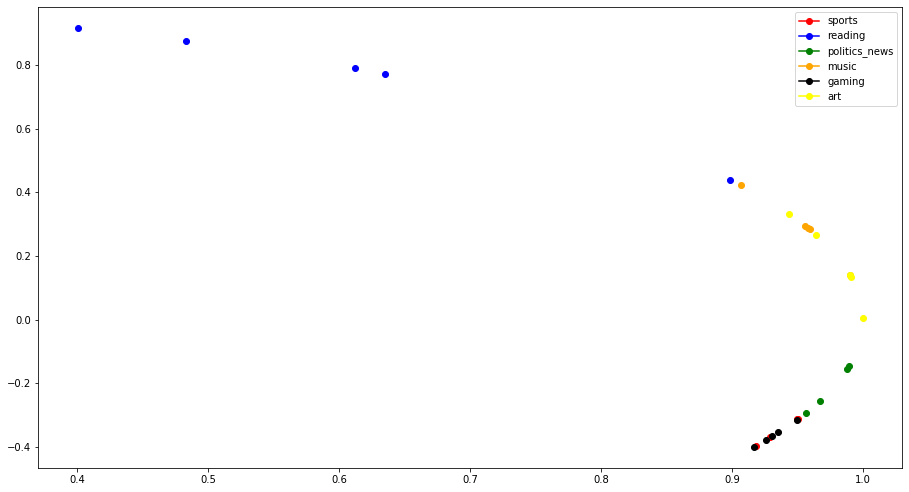

In [76]:
fig = plt.figure(figsize = [15, 8])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for i, sub in enumerate(X):
    ax.plot(sub[0], sub[1], color=colors[documents[i][2]][0], marker='o', label=get_label(i, colors, documents))
    
ax.legend()